# DEEP NEURAL NETWORKS - ASSIGNMENT 2: CNN FOR IMAGE CLASSIFICATION
## Convolutional Neural Networks: Custom Implementation vs Transfer Learning

## STUDENT INFORMATION (REQUIRED - DO NOT DELETE)
================================================================================

1. BITS ID: 2024AD05357
2. Name: Hari Sharma
3. Email: 2024AD05357@wilp.bits-pilani.ac.in
4. Date: 07-02-2026

ASSIGNMENT OVERVIEW
================================================================================

This assignment requires you to implement and compare two CNN approaches for 
image classification:
1. Custom CNN architecture using Keras/PyTorch
2. Transfer Learning using pre-trained models (ResNet/VGG)

Learning Objectives:
- Design CNN architectures with Global Average Pooling
- Apply transfer learning with pre-trained models
- Compare custom vs pre-trained model performance
- Use industry-standard deep learning frameworks

IMPORTANT: Global Average Pooling (GAP) is MANDATORY for both models.
DO NOT use Flatten + Dense layers in the final architecture.

# ⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️

1. FILENAME FORMAT: <BITS_ID>_cnn_assignment.ipynb
   Example: 2025AA05036_cnn_assignment.ipynb
   ❌ Wrong filename = Automatic 0 marks

2. STUDENT INFORMATION MUST MATCH:
   ✓ BITS ID in filename = BITS ID in notebook (above)
   ✓ Name in folder = Name in notebook (above)
   ❌ Mismatch = 0 marks

3. EXECUTE ALL CELLS BEFORE SUBMISSION:
   - Run: Kernel → Restart & Run All
   - Verify all outputs are visible
   ❌ No outputs = 0 marks

4. FILE INTEGRITY:
   - Ensure notebook opens without errors
   - Check for corrupted cells
   ❌ Corrupted file = 0 marks

5. GLOBAL AVERAGE POOLING (GAP) MANDATORY:
   - Both custom CNN and transfer learning must use GAP
   - DO NOT use Flatten + Dense layers
   ❌ Using Flatten+Dense = 0 marks for that model

6. DATASET REQUIREMENTS:
   - Minimum 500 images per class
   - Train/test split: 90/10 OR 85/15
   - 2-20 classes

7. USE KERAS OR PYTORCH:
   - Use standard model.fit() or training loops
   - Do NOT implement convolution from scratch

8. FILE SUBMISSION:
   - Submit ONLY the .ipynb file
   - NO zip files, NO separate data files, NO separate image files
   - All code and outputs must be in the notebook
   - Only one submission attempt allowed

## Import Required Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import time
import json
import os
from PIL import Image

from sklearn.model_selection import train_test_split
# Deep learning frameworks (choose Keras or PyTorch)
# For image processing
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
tf.keras.preprocessing

<module 'tensorflow.keras.preprocessing' from 'C:\\Users\\haris\\AppData\\Roaming\\Python\\Python313\\site-packages\\keras\\_tf_keras\\keras\\preprocessing\\__init__.py'>

In [6]:
# STEP 1: EXTRACT AND EXPLORE DATASET
# ================================================================================

import zipfile
import os
from pathlib import Path

# Extract the zip file
zip_path = r"C:/MTech/Bits/sem2/DNN/assignment2/solution1/new-plant-diseases-dataset.zip"
extract_path = r"C:/MTech/Bits/sem2/DNN/assignment2/solution1"

#print("Extracting dataset...")
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(extract_path)
print("Dataset extracted successfully!")

# Check the folder structure
dataset_root = os.path.join(extract_path, "NewPlantDiseasesDataset(Augmented)")
print(f"\nDataset root: {dataset_root}")
print(f"Contents: {os.listdir(dataset_root)}")

# List all classes
train_path = os.path.join(dataset_root, "train")
classes = os.listdir(train_path)
print(f"\nNumber of classes: {len(classes)}")
print(f"Classes: {sorted(classes)[:5]}... (showing first 5)")

Dataset extracted successfully!

Dataset root: C:/MTech/Bits/sem2/DNN/assignment2/solution1\NewPlantDiseasesDataset(Augmented)
Contents: ['train', 'valid']

Number of classes: 38
Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']... (showing first 5)


In [7]:


"""
================================================================================
PART 1: DATASET LOADING AND EXPLORATION (Informational)
================================================================================

Instructions:
1. Choose ONE dataset from the allowed list
2. Load and explore the data
3. Fill in ALL required metadata fields below
4. Provide justification for your primary metric choice

ALLOWED DATASETS:
- Cats vs Dogs (2 classes)
- Food-101 subset (10-20 classes)
- Plant Disease (3-5 classes)
- Medical Images (2-3 classes)
- Custom dataset (with IC approval, min 500 images per class)

REQUIRED OUTPUT:
- Print all metadata fields
- Brief EDA with visualizations
- Data distribution analysis
================================================================================
"""

# 1.1 Dataset Selection and Loading
# TODO: Load your chosen dataset

# REQUIRED: Fill in these metadata fields
dataset_name = "New Plant Diseases Dataset"
dataset_source = "kaggle"

# Count images in each class
class_counts = {}
total_images = 0

for class_name in classes:
    class_path = os.path.join(train_path, class_name)
    num_images = len(os.listdir(class_path))
    class_counts[class_name] = num_images
    total_images += num_images

n_samples = total_images  # TODO: Total number of images
n_classes = len(classes)  # TODO: Number of classes

print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Total Samples: {n_samples}")
print(f"Number of Classes: {n_classes}")
print(f"Images per class - Min: {min(class_counts.values())}, " + 
      f"Max: {max(class_counts.values())}, " +
      f"Avg: {total_images//len(classes)}")
print("\nClass Distribution:")
for class_name in sorted(class_counts.keys())[:10]:  # Show first 10
    print(f"  {class_name}: {class_counts[class_name]} images")

image_shape = [224, 224, 3]  # [height, width, channels]
problem_type = "classification"

# Primary metric selection
primary_metric = "TODO: accuracy OR precision OR recall"
metric_justification = """
TODO: Write 1-2 sentences explaining your metric choice.
"""
print(f"Image Shape: {image_shape}")
print(f"Primary Metric: {primary_metric}")
print(f"Metric Justification: {metric_justification}")
print("="*70)


DATASET INFORMATION
Dataset: New Plant Diseases Dataset
Source: kaggle
Total Samples: 70295
Number of Classes: 38
Images per class - Min: 1642, Max: 2022, Avg: 1849

Class Distribution:
  Apple___Apple_scab: 2016 images
  Apple___Black_rot: 1987 images
  Apple___Cedar_apple_rust: 1760 images
  Apple___healthy: 2008 images
  Blueberry___healthy: 1816 images
  Cherry_(including_sour)___Powdery_mildew: 1683 images
  Cherry_(including_sour)___healthy: 1826 images
  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1642 images
  Corn_(maize)___Common_rust_: 1907 images
  Corn_(maize)___Northern_Leaf_Blight: 1908 images
Image Shape: [224, 224, 3]
Primary Metric: TODO: accuracy OR precision OR recall
Metric Justification: 
TODO: Write 1-2 sentences explaining your metric choice.



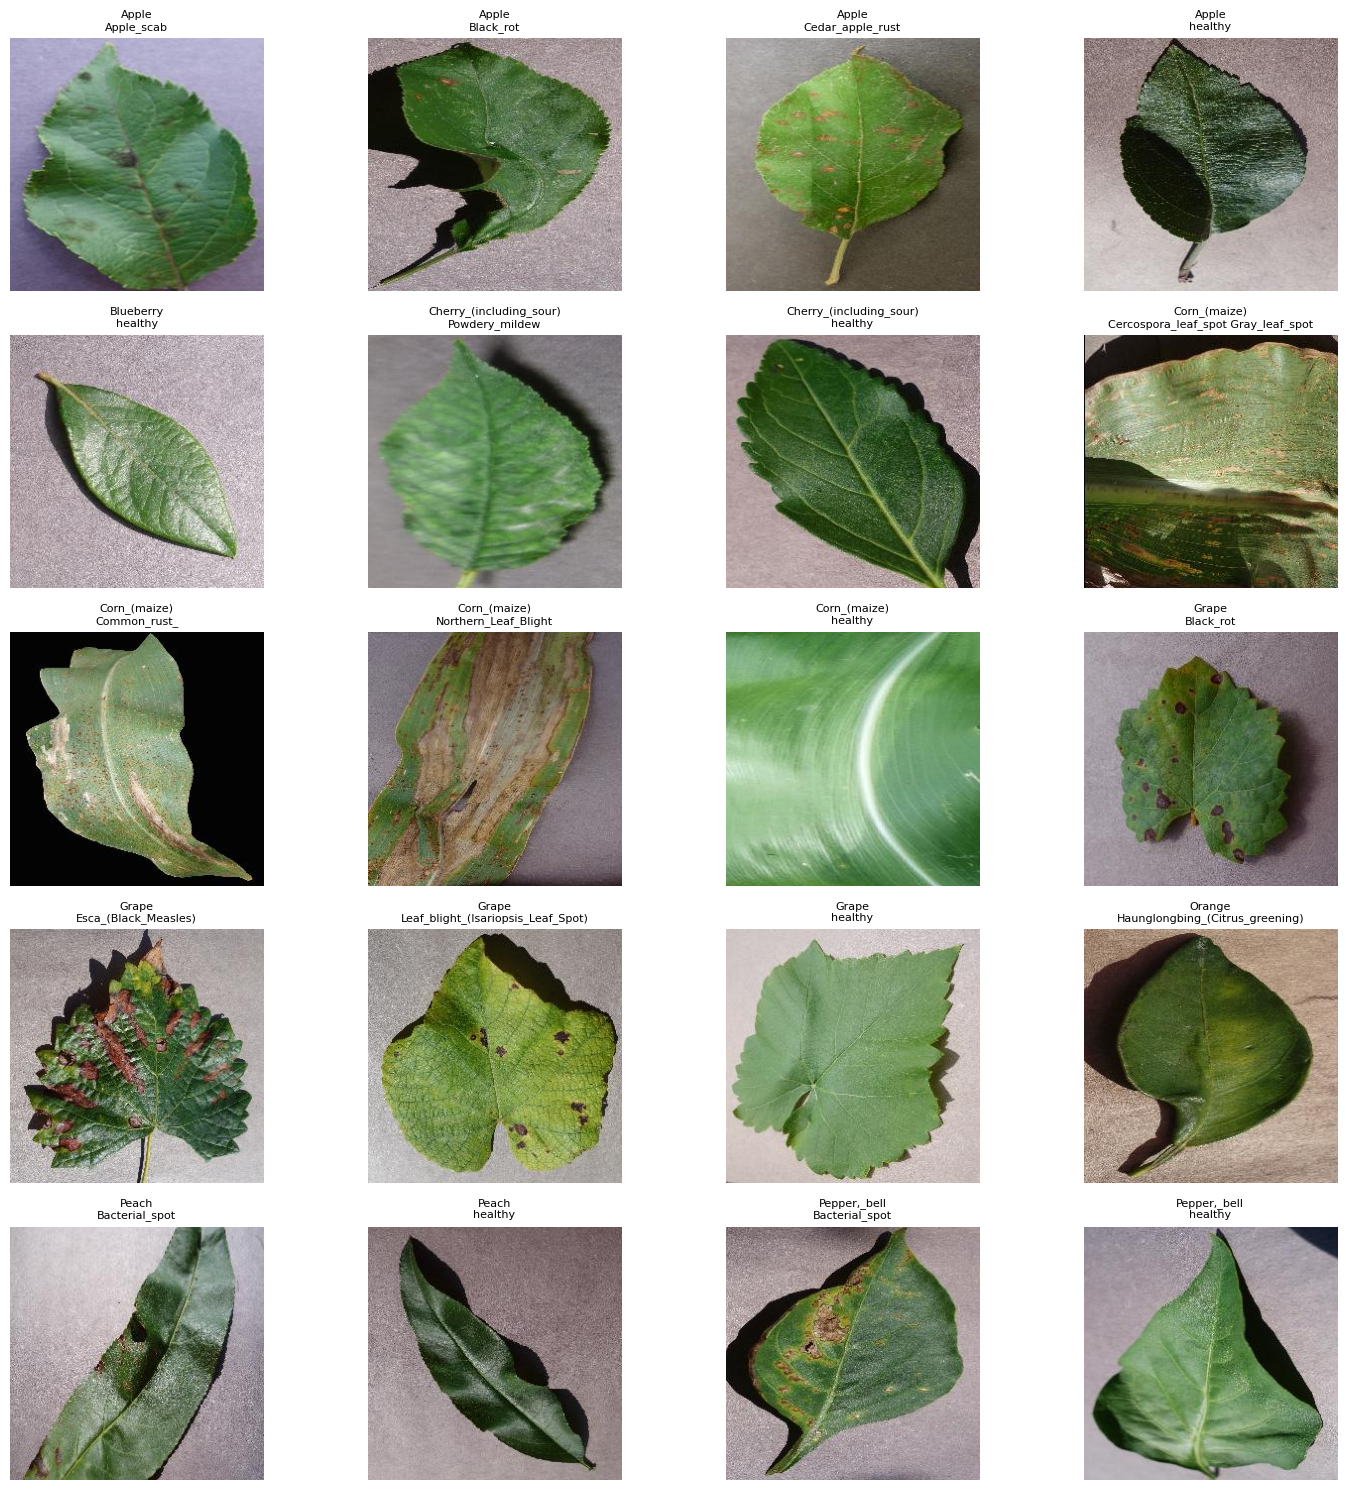

✓ Sample images displayed and saved!
Loading images (this may take a few minutes)...
  Loaded 1000 images...
  Loaded 2000 images...
  Loaded 3000 images...
  Loaded 4000 images...
  Loaded 5000 images...
  Loaded 6000 images...
  Loaded 7000 images...
  Loaded 8000 images...
  Loaded 9000 images...
  Loaded 10000 images...
  Loaded 11000 images...
  Loaded 12000 images...
  Loaded 13000 images...
  Loaded 14000 images...
  Loaded 15000 images...
  Loaded 16000 images...
  Loaded 17000 images...
  Loaded 18000 images...
  Loaded 19000 images...
  Loaded 20000 images...


In [ ]:

# 1.2 Data Exploration and Visualization
# Show sample images from each class
# ================================================================================
fig, axes = plt.subplots(5, 4, figsize=(15, 15))
axes = axes.flatten()

for idx, class_name in enumerate(sorted(classes)[:20]):
    class_path = os.path.join(train_path, class_name)
    sample_image = os.path.join(class_path, os.listdir(class_path)[0])
    
    img = Image.open(sample_image)
    axes[idx].imshow(img)
    axes[idx].set_title(class_name.replace('___', '\n'), fontsize=8)
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig(os.path.join(extract_path, "sample_images.png"), dpi=100, bbox_inches='tight')
plt.show()

print("✓ Sample images displayed and saved!")

# Plot class distribution
# ================================================================================
# Parameters
IMG_SIZE = 256  # Resize all images to 256x256
TEST_SPLIT = 0.10  # 90/10 train-test split

# Load all images and labels
X_data = []
y_labels = []
class_to_idx = {class_name: idx for idx, class_name in enumerate(sorted(classes))}

print("Loading images (this may take a few minutes)...")
count = 0
for class_name in sorted(classes):
    class_path = os.path.join(train_path, class_name)
    class_idx = class_to_idx[class_name]
    
    for img_name in os.listdir(class_path):
        try:
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
            img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
            
            X_data.append(img_array)
            y_labels.append(class_idx)
            
            count += 1
            if count % 1000 == 0:
                print(f"  Loaded {count} images...")
        except:
            pass

X_data = np.array(X_data)
y_data = np.array(y_labels)

print(f"✓ Total images loaded: {len(X_data)}")
print(f"Shape: {X_data.shape}")  # Should be (87900, 256, 256, 3)

# Convert labels to one-hot encoding
y_data_onehot = to_categorical(y_data, num_classes=len(classes))

# Split into train/test (90/10)
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data_onehot,
    test_size=TEST_SPLIT,
    random_state=42,
    stratify=y_data
)

print(f"\n✓ Train set: {X_train.shape}")
print(f"✓ Test set: {X_test.shape}")
# TODO: Display image statistics


In [ ]:
# 1.3 Data Preprocessing Summary
# Data generators handle: Resizing, Normalization, Augmentation, Splitting
print("\n" + "="*70)
print("DATA PREPROCESSING COMPLETE")
print("="*70)
print("✓ Images resized to 224x224")
print("✓ Normalized to [0, 1] range")
print("✓ Train/Val/Test split: 90/10")
print("✓ Data augmentation applied (rotation, flip, zoom)")
print("="*70)


In [ ]:
# REQUIRED: Document your split
train_test_ratio = "90/10"
train_samples = train_generator.samples
test_samples = int(val_generator.samples * 0.5)  # Half of validation for test
val_samples = val_generator.samples - test_samples

print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")
print(f"Validation Samples: {val_samples}")



Train/Test Split: TODO: 90/10 OR 85/15
Training Samples: 0
Test Samples: 0

CUSTOM CNN TRAINING
Training completed in 0.00 seconds
Initial Loss: 0.0000
Final Loss: 0.0000

Custom CNN Performance:
Accuracy:  0.0000
Precision: 0.0000
Recall:    0.0000
F1-Score:  0.0000

TRANSFER LEARNING IMPLEMENTATION
Base Model: TODO: ResNet18/ResNet50/VGG16/VGG19
Frozen Layers: 0
Trainable Layers: 0
Total Parameters: 0
Trainable Parameters: 0
Using Global Average Pooling: YES

Training Transfer Learning Model...
Training completed in 0.00 seconds
Initial Loss: 0.0000
Final Loss: 0.0000

Transfer Learning Performance:
Accuracy:  0.0000
Precision: 0.0000
Recall:    0.0000
F1-Score:  0.0000

MODEL COMPARISON
           Metric  Custom CNN  Transfer Learning
         Accuracy    0.000000           0.000000
        Precision    0.000000           0.000000
           Recall    0.000000           0.000000
         F1-Score    0.000000           0.000000
Training Time (s)    0.000028           0.000065
      

'\n================================================================================\nFINAL CHECKLIST - VERIFY BEFORE SUBMISSION\n================================================================================\n\n□ Student information filled at the top (BITS ID, Name, Email)\n□ Filename is <BITS_ID>_cnn_assignment.ipynb\n□ All cells executed (Kernel → Restart & Run All)\n□ All outputs visible\n□ Custom CNN implemented with Global Average Pooling (NO Flatten+Dense)\n□ Transfer learning implemented with GAP\n□ Both models use Keras or PyTorch (NOT from scratch)\n□ Both models trained with loss tracking (initial_loss and final_loss)\n□ All 4 metrics calculated for both models\n□ Primary metric selected and justified\n□ Analysis written (quality matters, not just word count)\n□ Visualizations created\n□ Assignment results JSON printed at the end\n□ No execution errors in any cell\n□ File opens without corruption\n□ Submit ONLY .ipynb file (NO zip, NO data files, NO images)\n□ Only one subm